# Analysis: air quality and asthma prevalence

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats

# Dependencies (local modules)
from countries import get_country

## Import air quality and asthma data
### Cleaned datasets
- cleaned_asthma_prevalence.csv
- cleaned_airquality.csv

In [2]:
# Import CSV to DataFrames
csv_airquality = Path("Cleaned_Datasets/cleaned_airquality.csv")
csv_asthma = Path("Cleaned_Datasets/cleaned_asthma_prevalence.csv")

airquality_df = pd.read_csv(csv_airquality)
asthma_df = pd.read_csv(csv_asthma)

In [3]:
# Air quality data uses country code instead of country name

# Iterate through the DataFrame
for index, row in airquality_df.iterrows():
    # Replace the country code by the country name
    airquality_df.loc[index,'Country'] = get_country(airquality_df.loc[index,'Country'])

# List all the countries in the air quality DataFrame
airquality_countries = airquality_df['Country'].unique().tolist()
print(f"{len(airquality_countries)} countries found.")
pprint(airquality_countries)

93 countries found.
['United Arab Emirates',
 'Afghanistan',
 'Argentina',
 'Austria',
 'Australia',
 'Bosnia and Herzegovina',
 'Bangladesh',
 'Belgium',
 'Bulgaria',
 'Bahrain',
 'Brazil',
 'Canada',
 'Switzerland',
 "Cote d'Ivoire",
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Spain',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran (Islamic Republic of)',
 'Iceland',
 'Italy',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'Republic of Korea',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Sri Lanka',
 'Lithuania',
 'North Macedonia',
 'Mali',
 'Myanmar',
 'Mongolia',
 'Macao',
 'Mexico',
 'The Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Peru',
 'Philippines',
 'Pakis

In [4]:
# Simplify the name of the data column in the asthma DataFrame
asthma_df = asthma_df.rename(columns={"Asthma Cases per 100 - Age-Std - Both Sex": "Asthma"})

# List all the countries in the asthma DataFrame
asthma_countries = asthma_df['Country'].unique().tolist()
print(f"{len(asthma_countries)} countries found.")
pprint(asthma_countries)

226 countries found.
['Afghanistan',
 'African Region (WHO)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (WB)',
 'East Timor',
 'Eastern Mediterranean Region (WHO)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europ

## Merge DataFrames
- Merged on country and year
- Only countries and years present in both files are kept

In [5]:
# Merge the two DataFrames and keep only the countries that are in both
analysis_df = pd.merge(airquality_df, asthma_df, on=["Country", "Year"], how="inner")
analysis_df.head()

,Country,Year,PM25,Asthma
0,United Arab Emirates,2015,118.714286,8.349840
1,United Arab Emirates,2016,92.000000,7.665928
2,United Arab Emirates,2018,122.683432,7.069434
3,United Arab Emirates,2019,111.881940,7.179908
4,Afghanistan,2019,187.457627,4.281019


## Top 10

### PM 25
Top 10 countries with the best air quality (based on PM25)

Analysis:
- Based on the data, we can see Switzerland has held the top ranks for best air qualiy, with Iceland, Sweden, and Estonia also having intermediate scores.

In [6]:
# Sorting through the top 10 countries with the best air quaity in years 2015-2021
analysis_sorted_by_PM25 = analysis_df.sort_values('PM25', ascending=True)
analysis_sorted_by_PM25[['Country','Year','PM25']].head(10)

,Country,Year,PM25
52,Switzerland,2019,2.242184
51,Switzerland,2018,2.414773
49,Switzerland,2016,2.451613
50,Switzerland,2017,3.397959
147,Iceland,2018,15.598901
148,Iceland,2019,16.100292
228,Sweden,2015,16.987805
146,Iceland,2017,18.333333
97,Estonia,2019,19.447247
145,Iceland,2016,21.344086


### Asthma
Top 10 countries with the best asthma prevalence (lower number)
Analysis:
- Based on the data we can see Nepal has had the best asthma prevalence. With Bangladesh, Kazakhstan and China also with intermeidate scores. It is interesting to see that these countries have the best asthma prevalence, considering they ranked quite low in the air quality index in the same years. (See table below). We predict many factors may affect the data, such as readily avaialble resources dedicated to diagnosing asthma and treating it might not be as common in these countries, hence the low scores in asthma prevalence. 

In [7]:
# Sorting through the countries with the best asthma prevalence from years 2015-2021
analysis_sorted_by_Asthma = analysis_df.sort_values('Asthma', ascending=True)
analysis_sorted_by_Asthma[['Country','Year','Asthma']].head(10)

,Country,Year,Asthma
193,Nepal,2017,1.043727
194,Nepal,2018,1.059282
195,Nepal,2019,1.072463
22,Bangladesh,2016,1.337310
23,Bangladesh,2017,1.342940
24,Bangladesh,2018,1.361040
25,Bangladesh,2019,1.390907
163,Kazakhstan,2018,1.572167
164,Kazakhstan,2019,1.590705
58,China,2015,1.680620


## Bottom 10

### PM25
Bottom 10 countries with the worst air quality (based on PM25)

Analysis:
- According to the data Afghanistan and Bangladesh ranked the worst in terms of air quality. We also have Mali, India, Bahrain and Nepal in the ranks. 

In [8]:
# Sorting through the bottom 10 countries with worst air quality.
analysis_sorted_by_PM25 = analysis_df.sort_values('PM25', ascending=False)
analysis_sorted_by_PM25[['Country','Year','PM25']].head(10)

,Country,Year,PM25
4,Afghanistan,2019,187.457627
24,Bangladesh,2018,159.808989
23,Bangladesh,2017,157.497326
176,Mali,2019,153.750000
140,India,2016,147.939673
141,India,2017,143.679880
37,Bahrain,2018,142.812865
25,Bangladesh,2019,142.792493
142,India,2018,139.787106
194,Nepal,2018,137.829545


### Asthma
Bottom 10 countries with the worst asthma prevalence (higher number)

Analysis: 
- According to the data, the worst countries for asthma prevalence contain Portugal, Australia, and Puerto Rico. 

In [9]:
analysis_sorted_by_Asthma = analysis_df.sort_values('Asthma', ascending=False)
analysis_sorted_by_Asthma[['Country','Year','Asthma']].head(10)

,Country,Year,Asthma
214,Portugal,2015,9.225774
215,Portugal,2016,9.135996
218,Portugal,2019,9.106180
217,Portugal,2018,9.082142
216,Portugal,2017,9.079505
17,Australia,2018,8.779659
18,Australia,2019,8.768433
16,Australia,2017,8.757421
213,Puerto Rico,2019,8.571064
15,Australia,2016,8.554107


## Data analysis

### Correlation between PM25 concentration and prevalence of asthma
We first look at the overall correlation by pulling the data for PM25 and asthma for all countries and all years at once.

- The graph below is showing a negative correlation between PM2.5 (particulate matter with a diameter of 2.5 micrometers or less) and asthma prevalence in countries from 2015 to 2019, it suggests that as the levels of PM2.5 increase, the prevalence of asthma tends to decrease.

- Factors that may affect this could be:
    - varying air quality regulations, differences in healthcare and reporting, socioeconomic factors, regional varations.
    - Example: Countries with better healthcare infrastructure and higher awareness about asthma might have more accurate and comprehensive reporting of asthma cases. This could result in higher recorded asthma prevalence rates even if the air quality is relatively better.

- The Pearson correlation coefficient, measures the strength and direction of the linear relationship between two variables. In this case, the R-value of -0.51 indicates a **moderate negative correlation** between the variables "Asthma" and "PM25." The negative sign implies that as the value of PM25 increases, the value of Asthma tends to decrease.

- Overall, the provided information suggests that there is a moderate negative correlation between Asthma and PM25, and the linear model implies that higher levels of PM25 are associated with lower values of Asthma based on the regression analysis.

R-value: -0.51
Linear model: [Asthma] = -0.0275 * [PM25] + 6.25


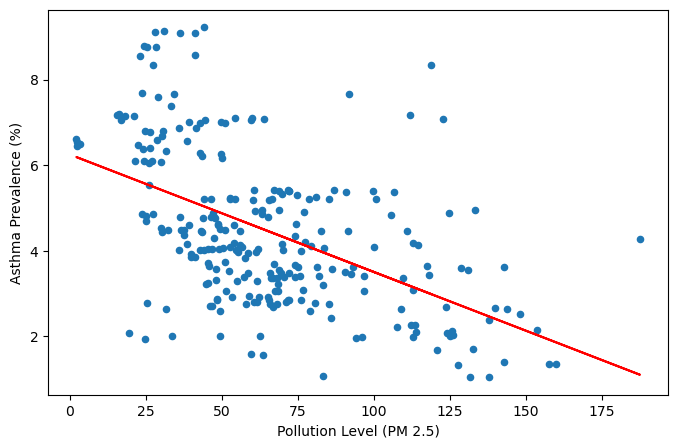

In [14]:
# Show a scatter plot of PM25 versus Asthma prevalence for all countries and all years
analysis_df.plot.scatter(x='PM25',y='Asthma', figsize=(8,5))

# Create a linear regression model based on the PM25 and Asthma data
x_data = analysis_df['PM25']
y_data = analysis_df['Asthma']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
print(f"R-value: {rvalue:.2f}")
print(f"Linear model: [Asthma] = {slope:.4f} * [PM25] + {intercept:.2f}")

y_reg = slope*x_data+intercept
plt.plot(x_data,y_reg,'r')
plt.xlabel('Pollution Level (PM 2.5)')
plt.ylabel('Asthma Prevalence (%)')

# Save image
plt.savefig('Images/PM25_and_Asthma.png')

# Show plot
plt.show()

## Changes of air quality and asthma over the years

### Analysis:
- Based on the box and whiskers below, we can draw from the PM25 plot that the air quality over the years from 2015-2019 has slowly and gradually increased in variation - with the data being more consistent in 2015 and gradually varying from 2016 and onwards. The box plots comparatively get larger/taller in the following years, after 2015.
- Looking at the boxes in Asthma and PM25 for the year 2015, we can see that the data's range is more consistent and condensed in this particular year.
- When comparing the median for asthma prevalence between the different boxes in the Asthma plot, we can see that the Median remains overall consistent through the years and close to the average, varying only slightly. Hovering at around 4. Although the data is widely distributed.
- If we compare the changes in the PM25 box plot in regards to the median, the median will slightly fluctuate over the years, but remain between the 55-65 range. 


In [90]:
year_list = analysis_df['Year'].unique().tolist()
year_list.sort()

year_list

[2015, 2016, 2017, 2018, 2019]

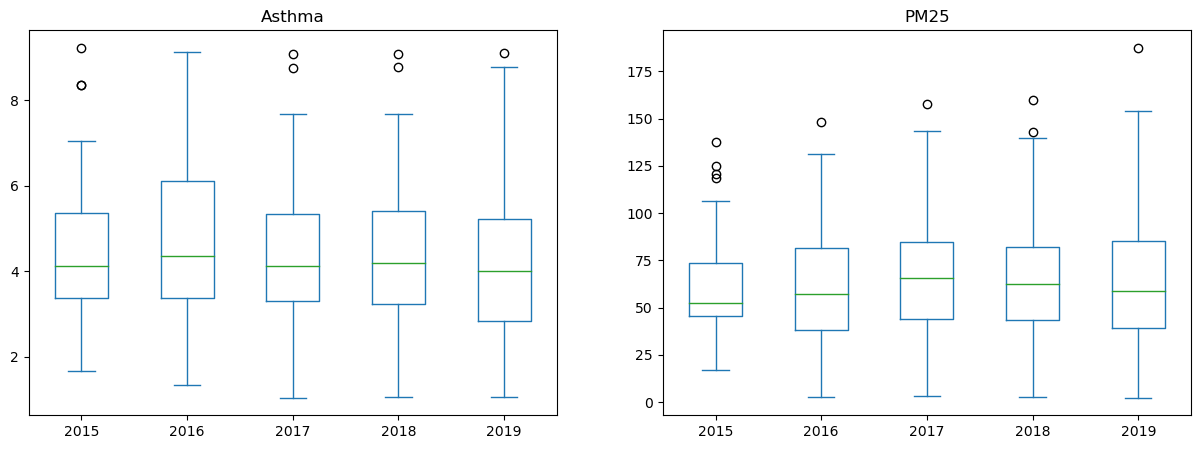

In [89]:
analysis_df.plot.box('Year',column=['PM25','Asthma'],figsize=(15,5))
plt.show()

<Figure size 640x480 with 0 Axes>

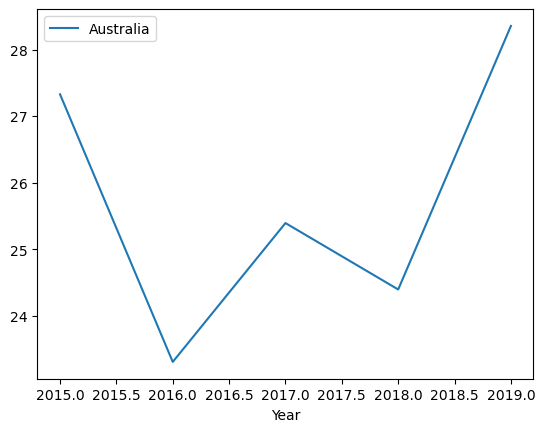

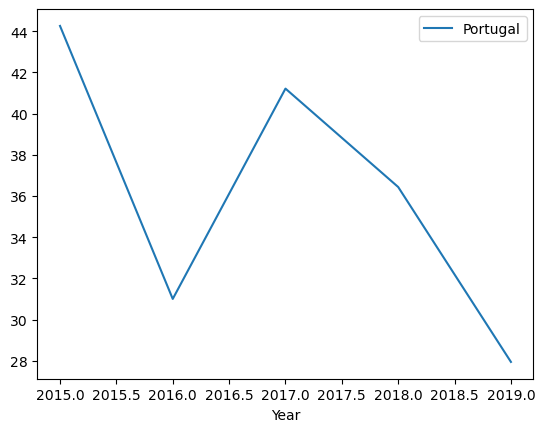

In [94]:
# Plotting countries for PM25 to see how they range
country = 'Australia'
country_df = analysis_df.loc[analysis_df['Country']==country,:]

plt.figure()
country_df.plot.line('Year','PM25',label=country)

country = 'Portugal'
country_df = analysis_df.loc[analysis_df['Country']==country,:]
country_df.plot.line('Year','PM25',label=country)

plt.show()

## Key Question:
### Does a country’s air quality have an impact on the asthma prevalence?

- Based on the data gathered and analysis conducted in this project - and if drawing a conclusion only made from this analysis - we would gather that there is a **moderately negative correlation** between air quality having an impact on the prevalence of asthma in countries. Meaning as air quality worsens - the asthma prevalence improves. We can conclude that there may be other varying factors and variables outside of these that may have affected the results. Some of which can include the varying air quality regulations in different countries, the differences in healthcare and reporting, socio-economic factors, etc. 

- If we look at Bangladesh and Nepal for example, both placing in the bottom tier of air quality, and high (better) tier for Asthma prevalence. We can interpret this data and assume that these countries' socio-economic factors, and as well as health care reporting and air quality regulations can have an implication on the results. Doing this analysis was very interesting, as we expected the data to demonstrate differently, but given external factors, it's reported a **moderately negative correlation**.
